<a href="https://colab.research.google.com/github/yexf308/AdvancedMachineLearning/blob/main/DBSCAN_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab inline 
from IPython.display import Image
import numpy.linalg as LA


Populating the interactive namespace from numpy and matplotlib


You may refer to [lectures](https://cse.buffalo.edu/~jing/cse601/fa12/) and [code](https://github.com/eriklindernoren/ML-From-Scratch/blob/master/mlfromscratch/unsupervised_learning/dbscan.py). Original code has some error and fixed here. 

# DBSCAN clustering
**DBSCAN** stands for Density-Based Spatial Clustering of Applications with Noise.

**Basic idea** of density based clustering:
- Clusters are dense regions in the data space,
separated by regions of lower object density. 

- A cluster is defined as a maximal set of densityconnected points.

- Discovers clusters of arbitrary shape.

- Very important advantages of DBSCAN are 
   - It is robust to outliers. 

   -  It does not require the number of clusters to be told beforehand. 

   - Can handle clusters of different shapes and sizes.



## Preliminary
### Density 
- $\epsilon$-ball: within a radius of $\epsilon$ from a point. 
$$N_\epsilon(p)= \{q: d(p,q)\le \epsilon\} $$

- High-density: $\epsilon$-ball of an object contains
at least **MinPts** of objects. 

In [2]:
display(Image(url='https://github.com/yexf308/AdvancedMachineLearning/blob/main/image/density.png?raw=true', width=600))

### Points
- A data point is a **Core** point if the $\epsilon$-ball around it contains at least **MinPts** number of points (including itself). 

- A data point is a **Boarder** point if the $\epsilon$-ball around it contains less **MinPts** number of points but is in the neighborhood of a core point. 

- A data point is a **Noise/Outlier** point if any point that is not a
core point nor a border point.

In [3]:
display(Image(url='https://github.com/yexf308/AdvancedMachineLearning/blob/main/image/core.png?raw=true', width=600))

In [4]:
display(Image(url='https://github.com/yexf308/AdvancedMachineLearning/blob/main/image/dbscan_example.png?raw=true', width=800))

### Density-reachability
- A data point $q$ is **directly density-reachable** from the point $p$ if the point $p$ is a core object and $q$ is in $p$'s $\epsilon$-ball. 

- A data point $q$ is **reachable** from the point $p$ if there is a path $p_1,\dots, p_n$ with $p_1=p$ and $p_n=q$, where each $p_{i+1}$  is directly reachable from $p_i$. 
Note that this implies that the initial point and all points on the path must be core points, with the possible exception of $q$.

- if $p$ is a core point, then it forms a cluster together with all points (core or boarder) that are reachable from it. Each cluster contains at least one core point; border points can be part of a cluster, but they form its "border", since they cannot be used to reach more points.

In [5]:
display(Image(url='https://github.com/yexf308/AdvancedMachineLearning/blob/main/image/density_reachable3.png?raw=true', width=500))

In this diagram, minPts = 4. 

- Point A and the other red points are **core points**, because the area surrounding these points in an $\epsilon$ radius contain at least 4 points (including the point itself). Because they are all reachable from one another, they form a single cluster. 

- Points B and C are not core points, but are reachable from A (via other core points) and thus belong to the cluster as well. 

- Point N is a noise point that is neither a core point nor directly-reachable.


1. Reachability is not a symmetric relation: by definition, only core points can reach non-core points. The opposite is not true, so a non-core point may be reachable, but nothing can be reached from it. 

2. Therefore, a further notion of connectedness is needed to formally define the extent of the clusters found by DBSCAN. Two points $p$ and $q$ are density-connected if there is a point $o$ such that both $p$ and $q$ are reachable from $o$. Density-connectedness is symmetric.

### Cluster 
A cluster then satisfies two properties:

- All points within the cluster are mutually density-connected.

- If a point is density-reachable from some point of the cluster, it is part of the cluster as well.

## DBSCAN Algorithm
- Find the points in the $\epsilon$-ball of every point, and identify the core points with more than minPts neighbors.

- Find the connected components of core points on the neighbor graph, ignoring all non-core points.

- Assign each non-core point to a nearby cluster if the cluster is an $\epsilon$ neighbor, which is the border point, otherwise assign it to noise.


A naive implementation of this requires storing the neighborhoods in step 1, thus requiring substantial memory. 

### A better way to implementation
- We start with an arbitrary starting point that has not been visited. Find the points in the $\epsilon$-ball of this point. If it contains sufficiently many points, a cluster is started. Otherwise, the point is labeled as noise. (Note: this point might later be found in a sufficiently sized $\epsilon$-ball of a different point and hence be made part of a cluster.)

- All points within the distance Ɛ become part of the same cluster. Repeat the procedure for all the new points added to the cluster group. Continue with the process until you visit and label each point within the $\epsilon$ neighbourhood of the cluster.

- On completion of the process, start again with a new unvisited point thereby leading to the discovery of more clusters or noise. At the end of the process, you ensure that you mark each point as either cluster or noise.

The following animation shows the detailed steps for this implementation. 



![dbscan_url](https://miro.medium.com/proxy/1*tc8UF-h0nQqUfLC8-0uInQ.gif "dbscan")


## Parameter Estimation
There are three parameters $\epsilon$, minPts and distance function. DBSCAN is very sensitive to the values of $\epsilon$ and minPts.

-  **minPts**: a minimum minPts can be derived from the number of dimensions D in the data set, as **minPts ≥ D + 1**.  Larger values are usually better for data sets with noise and will yield more significant clusters. As a rule of thumb, **minPts = 2·dim** can be used, but it may be necessary to choose larger values for very large data, for noisy data or for data that contains many duplicates. 

- **$\epsilon$:** The value for $\epsilon$ can then be chosen by using a k-distance graph, plotting the distance to the **k = minPts-1** nearest neighbor ordered from the largest to the smallest value. (this could be expensive, you might only choose part of data. ) Good values of ε are where this plot shows an “elbow”: if $\epsilon$ is chosen much too small, a large part of the data will not be clustered; whereas for a too high value of $\epsilon$, clusters will merge and the majority of objects will be in the same cluster. In general, small values of $\epsilon$ are preferable, and as a rule of thumb, only a small fraction of points should be within this distance of each other.


- **Distance function**: The choice of distance function is tightly linked to the choice of $\epsilon$, and has a major impact on the outcomes. In general, it will be necessary to first identify a reasonable measure of similarity for the data set, before the parameter ε can be chosen. There is no estimation for this parameter, but the distance functions need to be chosen appropriately for the data set.

In [6]:
display(Image(url='https://github.com/yexf308/AdvancedMachineLearning/blob/main/image/k_distance.png?raw=true', width=500))

### When DBSCAN Does NOT Work Well
1. Cannot handle varying densities

2. sensitive to parameters—hard to
determine the correct set of
parameters

In [7]:
class DBSCAN():
    """A density based clustering method that expands clusters from 
    samples that have more neighbors within a radius specified by eps
    than the value minPts.
    Parameters:
    -----------
    eps: float
        The radius within which samples are considered neighbors
    minPts: int
        The number of neighbors required for the sample to be a core point. 
    """
    def __init__(self, eps=1, minPts=5):
        self.eps = eps
        self.minPts = minPts

    def _get_neighbors(self, sample_i):
        """ Return a list of indexes of neighboring samples
        A sample_2 is considered a neighbor of sample_1 if the distance between
        them is smaller than epsilon """
        neighbors = []
        for i, _sample in enumerate(self.X):
            distance = norm(self.X[sample_i]- _sample, 2)
            if distance < self.eps:
                neighbors.append(i)
        return np.array(neighbors)

    def _expand_cluster(self, sample_i, neighbors):
        """ Recursive method which expands the cluster until we have reached the border
        of the dense area (density determined by eps and minPts) """
        """ In the HW, you are going to implement in the different way, you can try to compare the speed"""
        cluster = [sample_i]
        # Iterate through neighbors
        for neighbor_i in neighbors:
            if not neighbor_i in self.visited_samples:
                self.visited_samples.append(neighbor_i)
                # Fetch the sample's distant neighbors (neighbors of neighbor)
                self.neighbors[neighbor_i] = self._get_neighbors(neighbor_i)
                # Make sure the neighbor's neighbors are more than minPts
                # (If this is true the neighbor is a core point)
                if len(self.neighbors[neighbor_i]) >= self.minPts:
                    # Expand the cluster from the neighbor
                    expanded_cluster = self._expand_cluster(
                        neighbor_i, self.neighbors[neighbor_i])
                    # Add expanded cluster to this cluster
                    cluster = cluster + expanded_cluster
                else:
                    # If the neighbor is not a core point we only add the neighbor point
                    cluster.append(neighbor_i)
        return cluster

    def _get_cluster_labels(self):
        """ Return the samples labels as the index of the cluster in which they are
        contained """
        # Set default value to number of clusters
        # Will make sure all outliers have same cluster label
        labels = np.full(shape=self.X.shape[0], fill_value=len(self.clusters))
        for cluster_i, cluster in enumerate(self.clusters):
            for sample_i in cluster:
                labels[sample_i] = cluster_i
        return labels

    # DBSCAN
    def predict(self, X):
        self.X = X
        self.clusters = []
        self.visited_samples = []
        self.neighbors = {}
        n_samples = np.shape(self.X)[0]
        # Iterate through samples and expand clusters from them
        # if they have more neighbors than self.minPts
        for sample_i in range(n_samples):
            if sample_i in self.visited_samples:
                continue
            self.neighbors[sample_i] = self._get_neighbors(sample_i)
            if len(self.neighbors[sample_i]) >= self.minPts:
                # If core point => mark as visited
                self.visited_samples.append(sample_i)
                # Sample has more neighbors than self.minPts => expand
                # cluster from sample
                new_cluster = self._expand_cluster(
                    sample_i, self.neighbors[sample_i])
                # Add cluster to list of clusters
                self.clusters.append(new_cluster)

        # Get the resulting cluster labels
        cluster_labels = self._get_cluster_labels()
        return cluster_labels

You can try to change different minPts and $\epsilon$, you will find the cluster changes dramatically. Sometimes, the border points may be assigned to different cluster even with the same parameters. 

<Figure size 432x288 with 0 Axes>

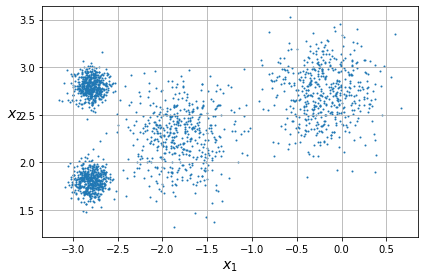

In [8]:
from sklearn.datasets import make_blobs

def plot_clusters(X, y=None, Mu_array=0):
    fig, ax = plt.subplots(figsize=(6, 4))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    if sum(Mu_array) != 0:
        plt.scatter(Mu_array[:,0],Mu_array[:,1],marker="x", color="black", linewidth=2)
        
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    plt.grid()
    plt.tight_layout()  
    plt.show()     


if 1:
    blob_centers = np.array(
        [[ -0.2,  2.75],
         [-1.8 ,  2.3],
         [-2.8,  1.8],
         [-2.8,  2.8]])
    blob_std = np.array([0.3, 0.3, 0.1, 0.1])
    X, y = make_blobs(n_samples=2000, centers=blob_centers,
                      cluster_std=blob_std, random_state=7) 

figure()
plot_clusters(X)      

In [9]:
N = X.shape[0]
dist_matrix = zeros([N,N])
for i in range(N):
  for j in range(N):
    dist_matrix[i,j]=norm(X[i]-X[j],2)

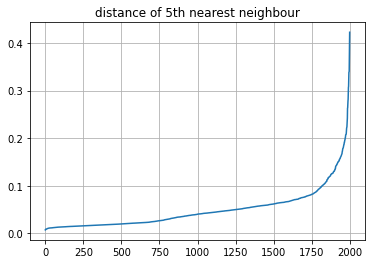

In [10]:
K=5
knn_matrix = np.sort(dist_matrix, axis = 1)[:, 1 : K + 1]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(arange(N),sort(knn_matrix[:,-1]))
ax.set_title(f"distance of {K}th nearest neighbour")
ax.grid(True)

In [11]:
test = DBSCAN(eps=0.12, minPts=K+1)
label=test.predict(X)

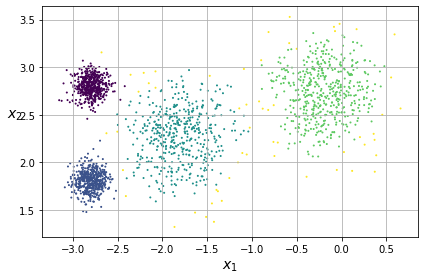

In [12]:
plot_clusters(X, y=label)

## Three circles with large noise

In [13]:
import itertools

def sample_spiral():
  # Only 2 clusters in this case. This is hard-coded.
  points_per_cluster = 500
  bandwidth = 0.1

  data = np.empty((points_per_cluster, 2))

  w = np.arange(1, points_per_cluster + 1).astype(np.float32) / points_per_cluster
  data[:,0] = (4 * w + 1) * np.cos(2*np.pi * w) + np.random.randn(points_per_cluster) * bandwidth
  data[:,1] = (4 * w + 1) * np.sin(2*np.pi * w) + np.random.randn(points_per_cluster) * bandwidth
  data = np.vstack((data, -data))

  return data


def sample_circle(num_clusters):
  points_per_cluster = 500
  bandwidth = 0.15

  data = np.zeros((num_clusters * points_per_cluster, 2))
  for k, n in itertools.product(range(num_clusters), range(points_per_cluster)):
    theta = 2 * np.pi * np.random.uniform()
    rho = k + 1 + np.random.randn() * bandwidth
    x, y = pol2cart(theta, rho)
    idx = k * points_per_cluster + n
    data[idx, 0] = x
    data[idx, 1] = y
  data = data.reshape((num_clusters * points_per_cluster, 2))
  return data

def pol2cart(theta, rho):
  x = rho * np.cos(theta)
  y = rho * np.sin(theta)
  return(x, y)  

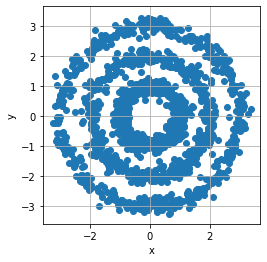

In [14]:
data = sample_circle(3)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
scatter(data[:,0],data[:,1])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.axis('square')
ax.grid(True)

In [15]:
N = data.shape[0]
dist_matrix = zeros([N,N])
for i in range(N):
  for j in range(N):
    dist_matrix[i,j]=norm(data[i]-data[j],2)

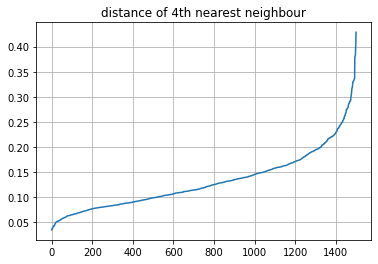

In [20]:
K=4
knn_matrix = np.sort(dist_matrix, axis = 1)[:, 1 : K + 1]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(arange(N),sort(knn_matrix[:,-1]))
ax.set_title(f"distance of {K}th nearest neighbour")
ax.grid(True)

In [21]:
test = DBSCAN(eps=0.25, minPts=K+1)
label=test.predict(data)

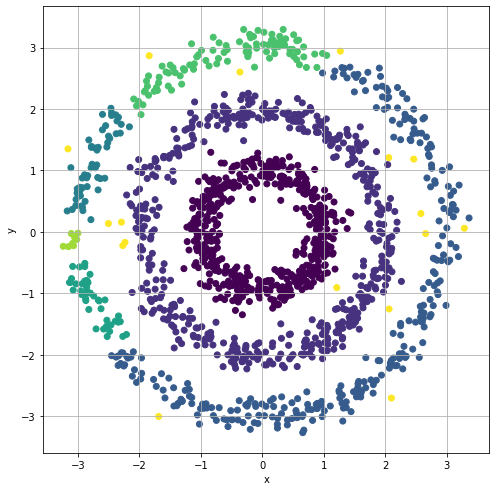

In [22]:
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(1,1,1)
scatter(data[:,0],data[:,1],c=label)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.axis('square')
ax.grid(True)

In [23]:
unique(label)

array([0, 1, 2, 3, 4, 5, 6, 7])